In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm

mpl.rcParams['figure.max_open_warning'] = 0
pd.set_option('display.max_rows', 100)

In [2]:
fig_size_1 = (15, 3)
fig_size_2 = (9, 3)
top_n = 30

today = datetime.today().strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
five_years = (datetime.today()-relativedelta(years=5)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')
twenty_years = (datetime.today()-relativedelta(years=20)).strftime('%Y-%m-%d')
thirty_years = (datetime.today()-relativedelta(years=30)).strftime('%Y-%m-%d')
fifty_years = (datetime.today()-relativedelta(years=30)).strftime('%Y-%m-%d')
nineteen_seventy = '1970-01-02'

start_date = thirty_years
end_date = today

ma_period_1 = 253

In [3]:
def get_dma_analysis(ticker, ma_period, start_date=start_date, end_date=end_date):
    df = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()
    df['DMA'] = df['Close'].rolling(ma_period).mean()
    df['PCH_DMA'] = 100*(df['Close']-df['DMA'])/df['DMA']
    df['PCH_DMA_MEAN'] = df['PCH_DMA'].mean()
    df['PCH_DMA_MEDIAN'] = df['PCH_DMA'].median()
    df = df.round(3)
    return df
        
def plot_dma_analysis(df, start_date=start_date, end_date=end_date, title=''):
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['Close', 'DMA'], style = ['-', '--'],
        figsize=fig_size_1, grid=True, title=title+' (price)')
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN'], style=['-', '--', '--'],
        figsize=fig_size_1, grid=True, title=title+' (DMA)')
    
def plot_dma_hist(df, bins=100, title=''):
    df.plot(x='Date', y=['PCH_DMA'], kind='hist', bins=bins,
            figsize=fig_size_1, grid=True, title=title+' (DMA hist)')
    
def get_dma_percentile(df, bins=100):
    current_pch_dma_rank_percentile = round(100*df['PCH_DMA'].dropna().rank(axis=0).tail(1).values[0]/len(df['PCH_DMA'].dropna()), 2)
    return(current_pch_dma_rank_percentile)

def get_dma_tickers(tickers, ma_period, start_date=start_date):
    a, b, c, d, e, f = ([] for i in range(6))
    for ticker in tqdm(tickers):
        try:
            df = get_dma_analysis(ticker=ticker, ma_period=ma_period, start_date=start_date)
            a.append(get_dma_percentile(df))
            b.append(df[['PCH_DMA']].tail(1).values[0][0])
            c.append(df[['PCH_DMA_MEAN']].tail(1).values[0][0])
            d.append(df[['PCH_DMA_MEDIAN']].tail(1).values[0][0])
            e.append(df[['Close']].tail(1).values[0][0])
            f.append(df[['DMA']].tail(1).values[0][0])
        except:
            print(ticker)
    df = pd.DataFrame()
    df['ticker'] = tickers
    df['percentile'] = a
    df['pch'] = b
    df['pch_mean'] = c
    df['pch_median'] = d
    df['close'] = e
    df['dma'] = f    
    return df

def analyze_ticker_dma(ticker, ma_period, start_date=start_date):    
    df = get_dma_analysis(ticker=ticker, ma_period=ma_period, start_date=start_date)
    plot_dma_analysis(df, start_date=start_date, title=ticker)
    print(ticker+' DMA percentile:', get_dma_percentile(df))
    plot_dma_hist(df, title=ticker)

In [4]:
my_tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER', 'XOM', 'BA', 'DAL', 'UAL', 'AAL',
              'XLE', 'IVV', 'VNQ', 'VCSH',
              '^GSPC', 'SMH', 'QQQ', 'SHV', 'MCHI', 'INDA', 'INR=X', 'CL=F', 'GC=F', 'BTC-USD',
              'TSLA', 'BRK-B', 'V', 'JNJ', 'JPM', 'WMT', 'MA', 'PYPL', 'UNH', 'NVDA', 'PG', 'DIS',
              'BAC', 'CMCSA', 'NFLX', 'INTC', 'KO', 'T', 'PEP', 'ORCL', 'CVX', 'WFC', 'C', 'SBUX',
              'IBM', 'AMD', 'GS', 'SCHW', 'AXP', 'GE', 'LMT', 'MU', 'BKNG', 'FDX', 'SPOT', 'TWTR',
              'BABA', 'TCEHY', 'TSM', 'JD', 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'SBIN.NS',
              'XLK', 'XLV', 'XLC', 'XLY', 'XLF', 'XLI', 'XLP', 'XLU', 'XLRE', 'XLB',
              'VGSH', 'VGIT', 'VGLT', 'BSV', 'BIV', 'BLV', 'BND']

sectors = ['XLK', 'XLV', 'XLY', 'XLC', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLE', 'XLRE', 'SPY']

bonds = ['SHV', 'VCSH', 'VGSH', 'VCIT', 'VGIT', 'VCLT', 'VGLT', 'BND']

dma_tickers = ['^GSPC', 'BND', 'AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'XOM', 'BA',
               'VNQ', 'VCSH', 'VGLT', 'SHV', 'BTC-USD', 'GC=F', 'CL=F',
               'MCHI', 'INDA', 'INR=X', 'RELIANCE.NS']

  0%|          | 0/12 [00:00<?, ?it/s]

<AxesSubplot:xlabel='ticker'>

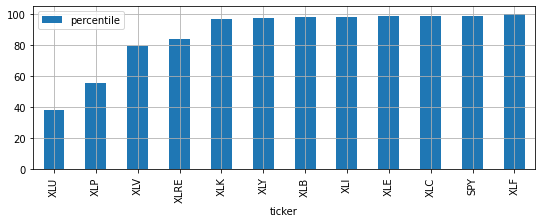

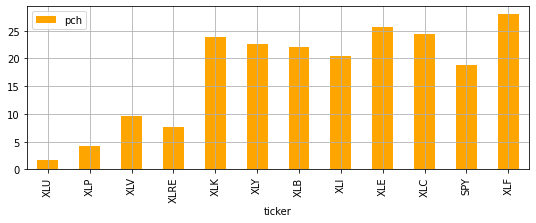

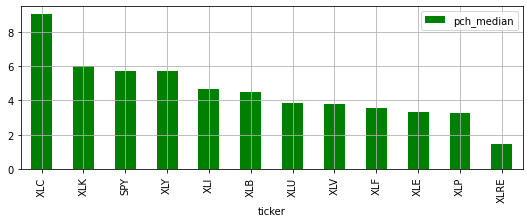

In [5]:
df_sectors = get_dma_tickers(sectors, ma_period=ma_period_1, start_date=start_date)

df_sectors.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_2, grid=True)
df_sectors.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_2, grid=True, color='orange')

df_sectors.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_2, grid=True, color='green')

  0%|          | 0/8 [00:00<?, ?it/s]

<AxesSubplot:xlabel='ticker'>

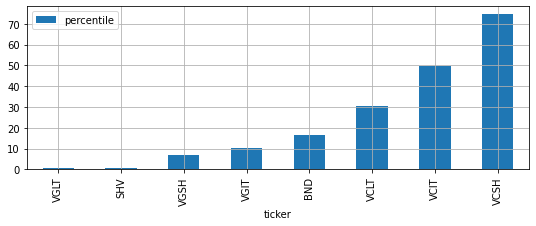

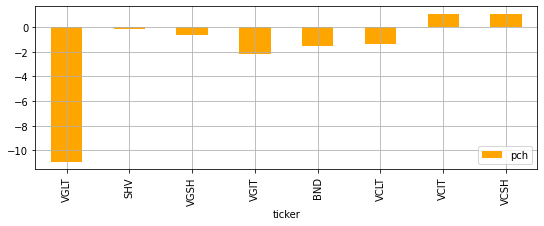

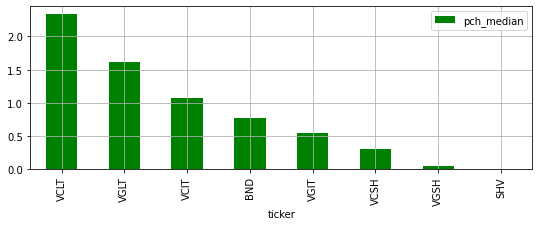

In [6]:
df_bonds = get_dma_tickers(bonds, ma_period=ma_period_1, start_date=start_date)

df_bonds.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_2, grid=True)
df_bonds.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_2, grid=True, color='orange')

df_bonds.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_2, grid=True, color='green')

^GSPC DMA percentile: 98.74
BND DMA percentile: 16.65
AMZN DMA percentile: 49.5
AAPL DMA percentile: 73.62
FB DMA percentile: 25.37
GOOGL DMA percentile: 95.29
MSFT DMA percentile: 78.89
XOM DMA percentile: 98.41
BA DMA percentile: 83.24
VNQ DMA percentile: 81.78
VCSH DMA percentile: 74.6
VGLT DMA percentile: 0.55
SHV DMA percentile: 0.91
BTC-USD DMA percentile: 97.9
GC=F DMA percentile: 23.72
CL=F DMA percentile: 99.94
MCHI DMA percentile: 99.73
INDA DMA percentile: 99.6
INR=X DMA percentile: 15.89
RELIANCE.NS DMA percentile: 57.72


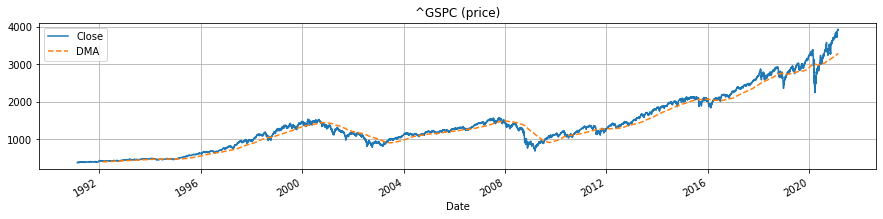

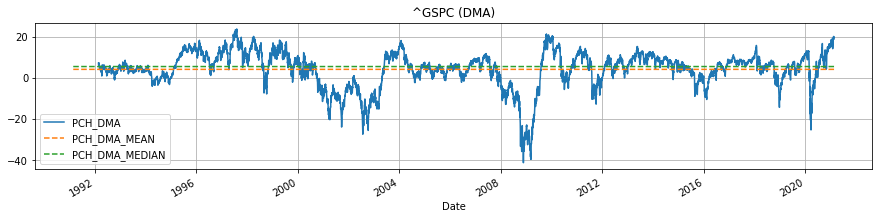

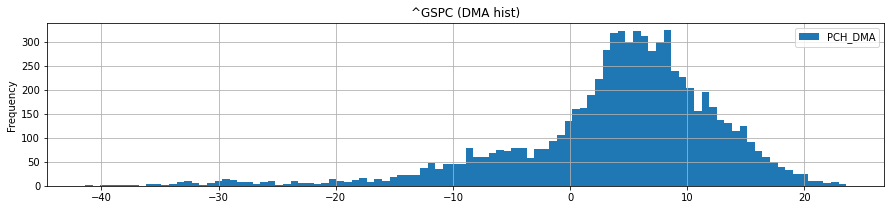

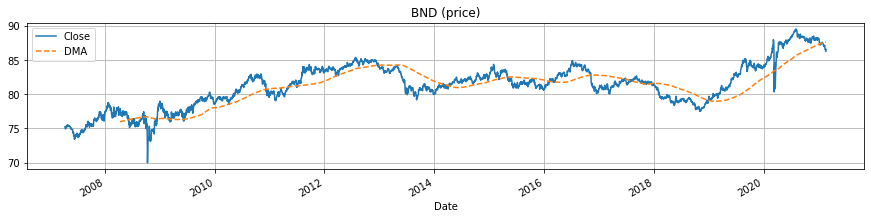

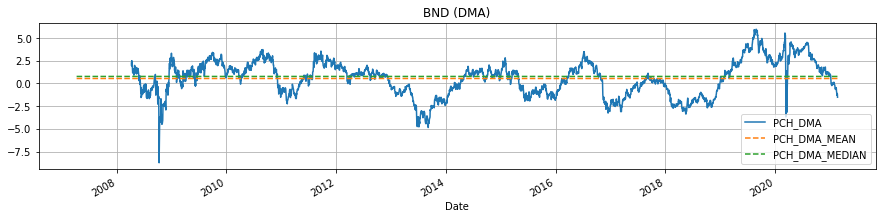

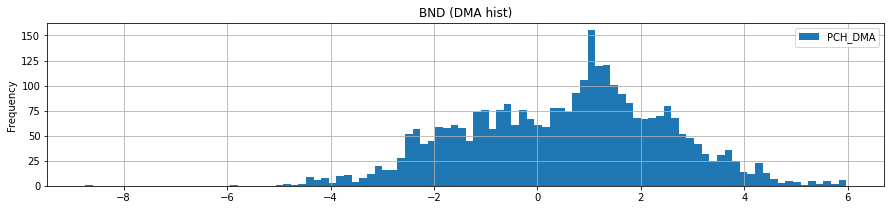

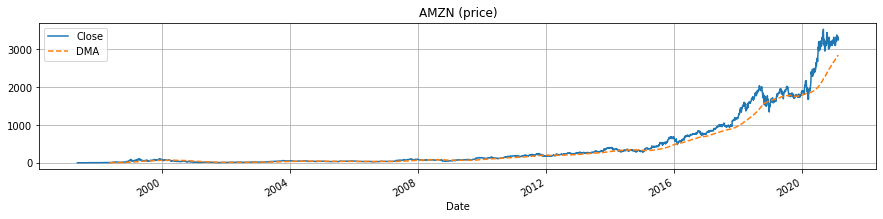

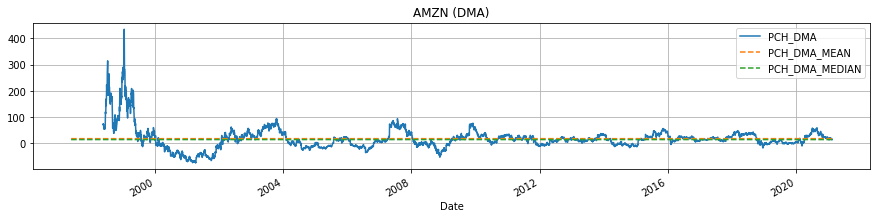

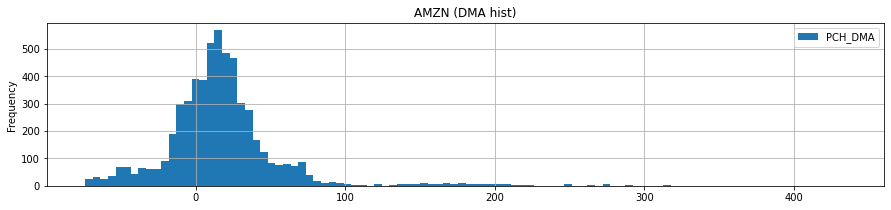

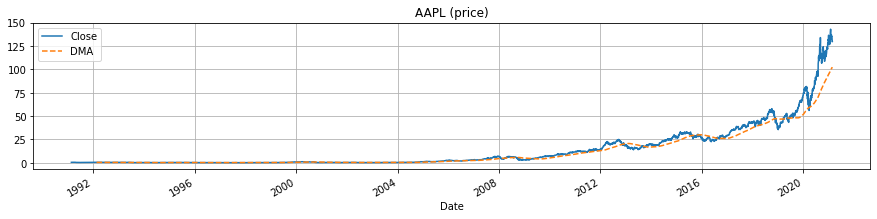

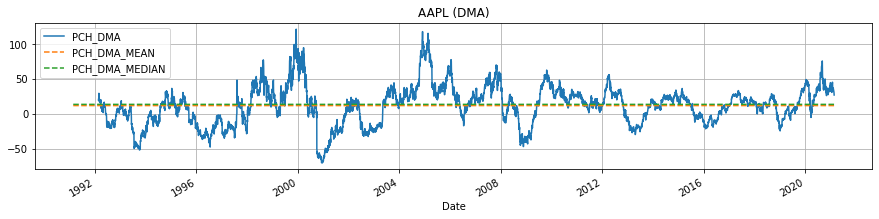

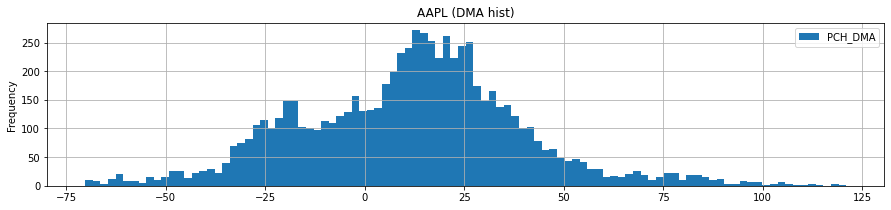

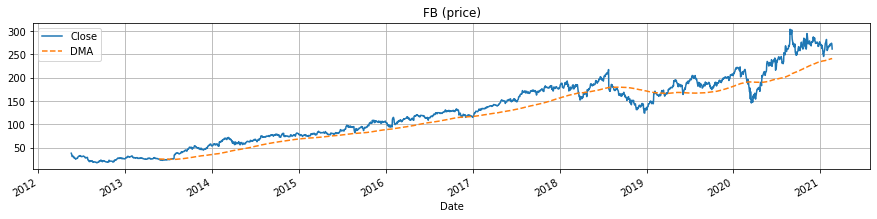

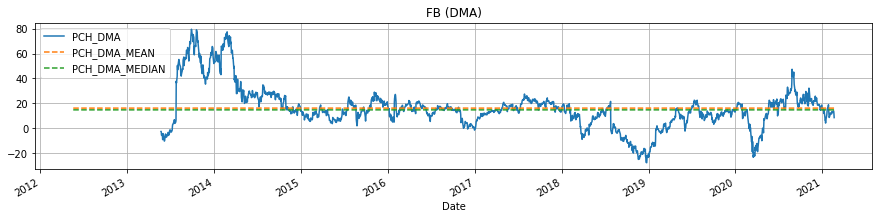

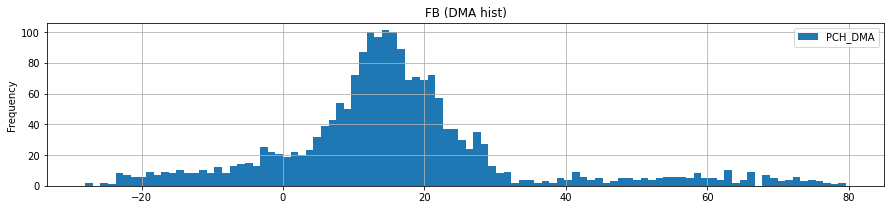

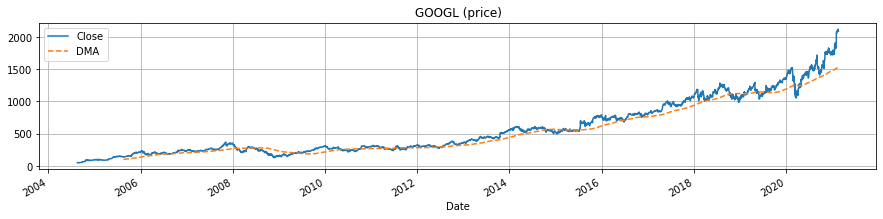

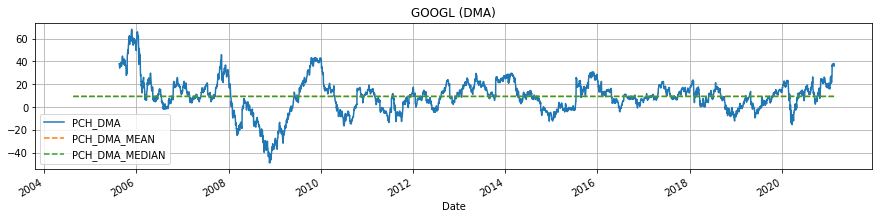

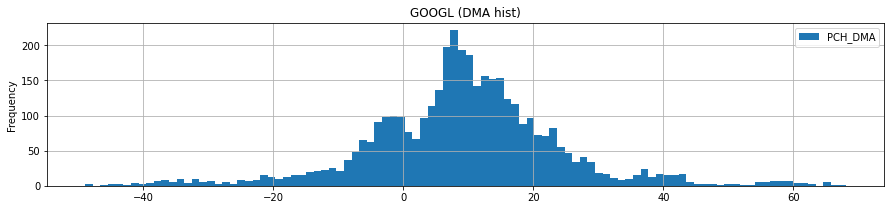

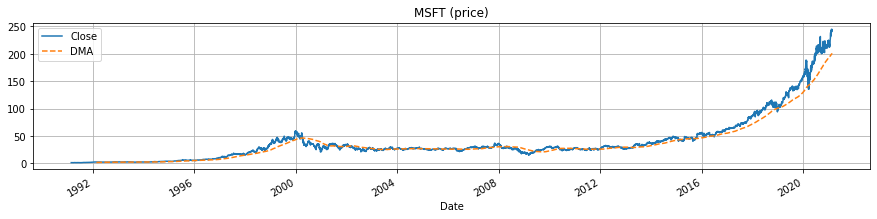

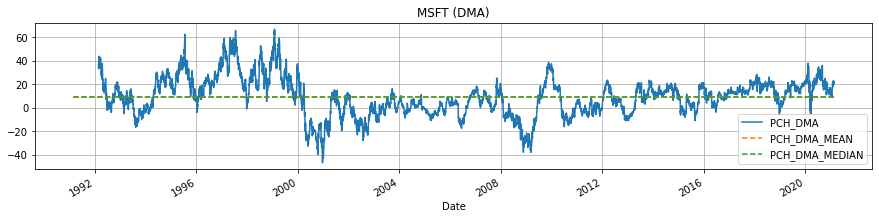

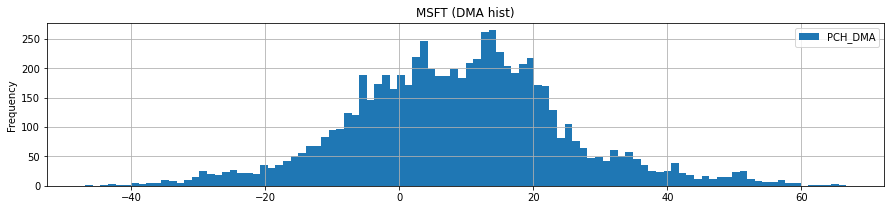

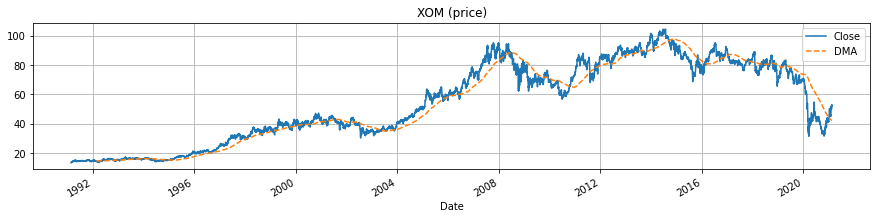

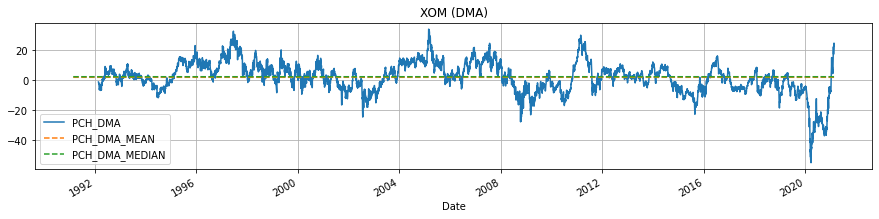

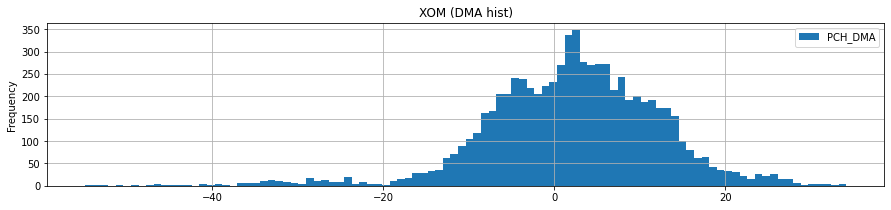

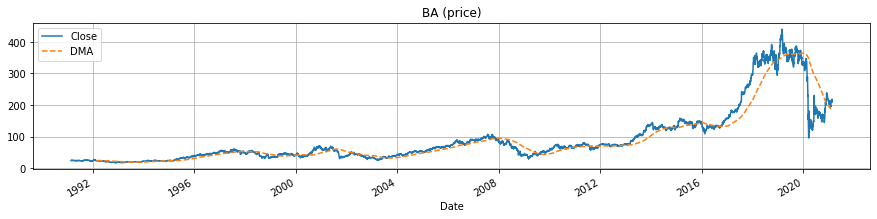

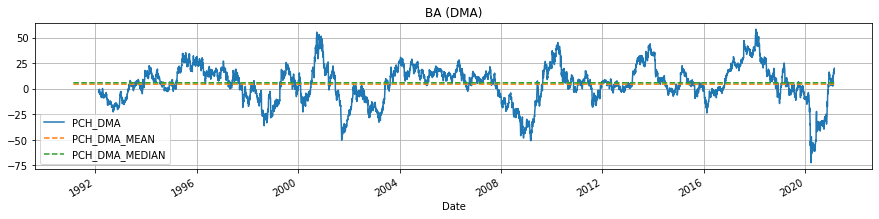

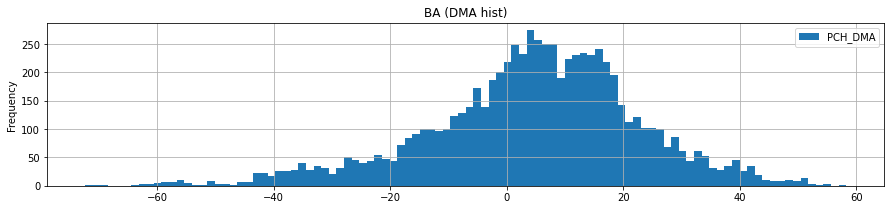

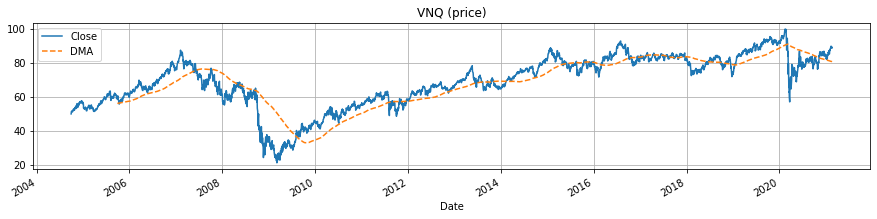

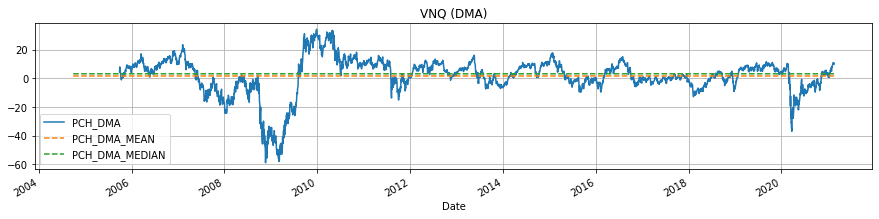

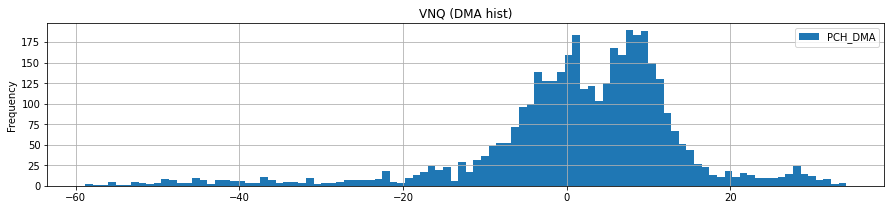

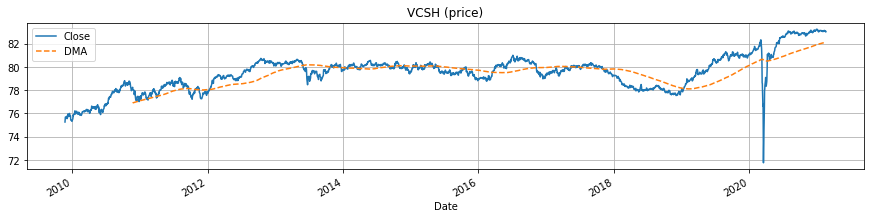

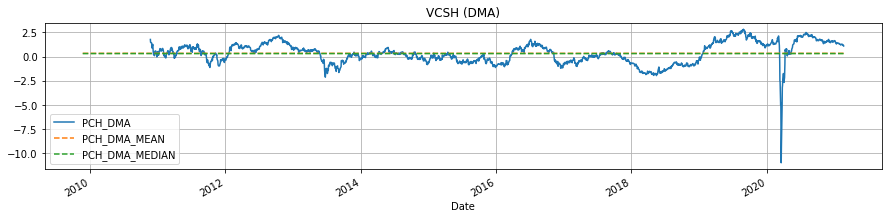

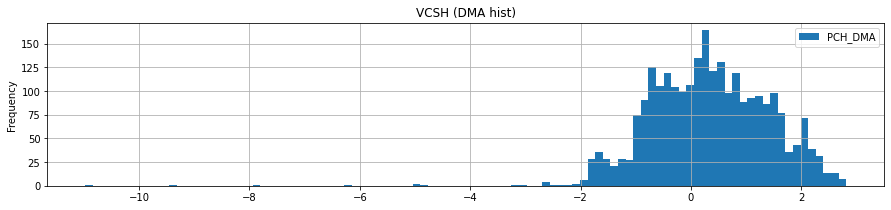

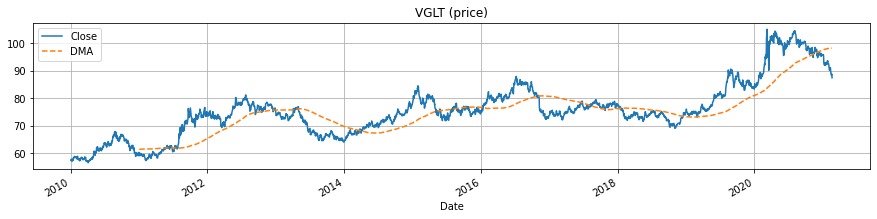

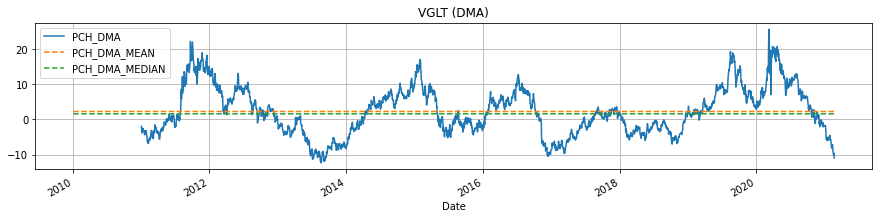

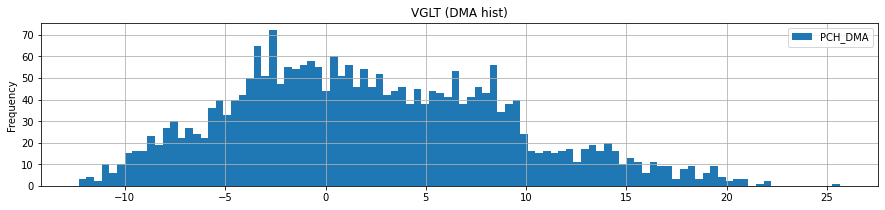

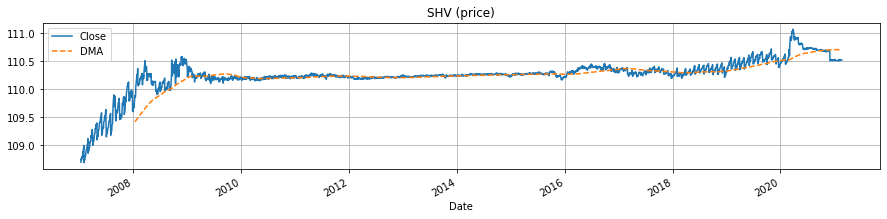

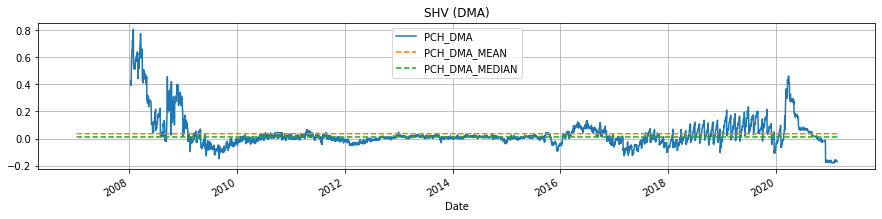

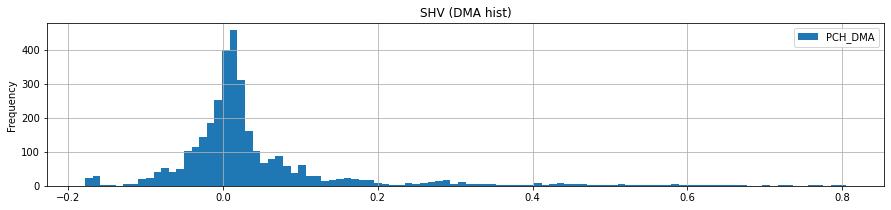

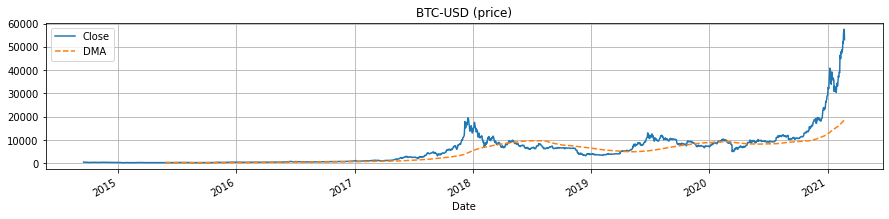

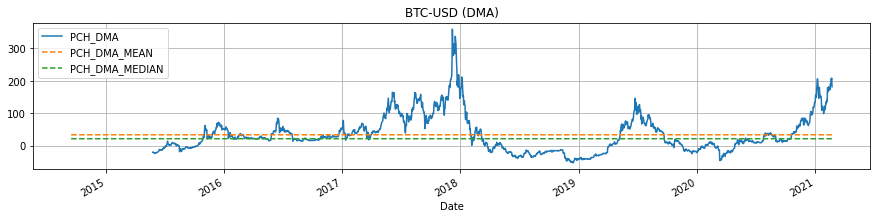

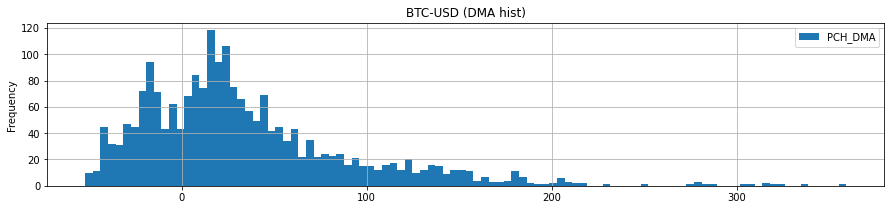

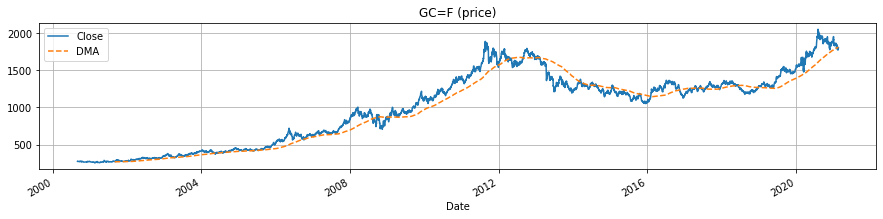

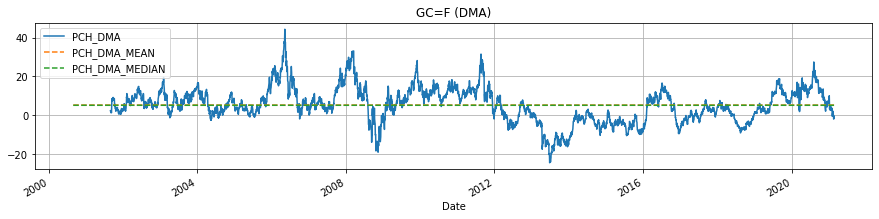

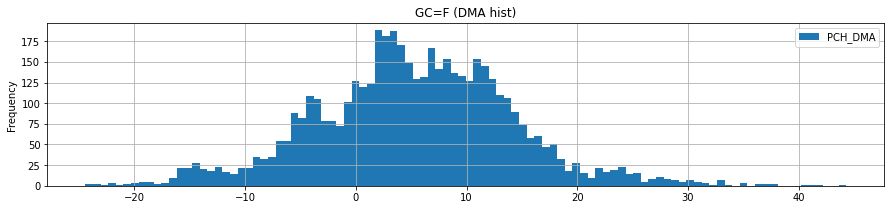

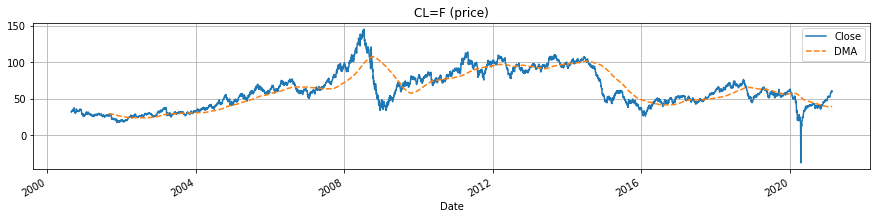

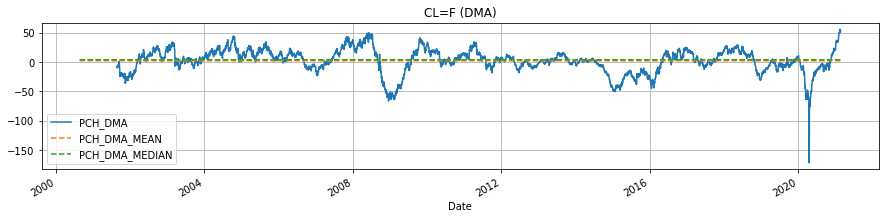

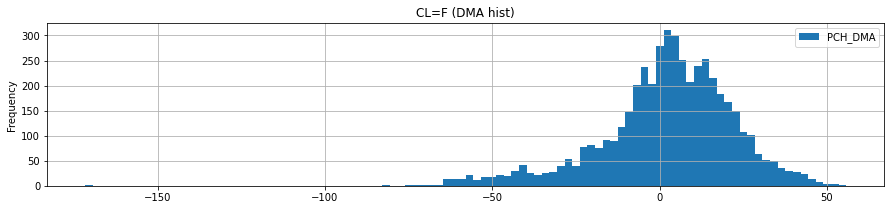

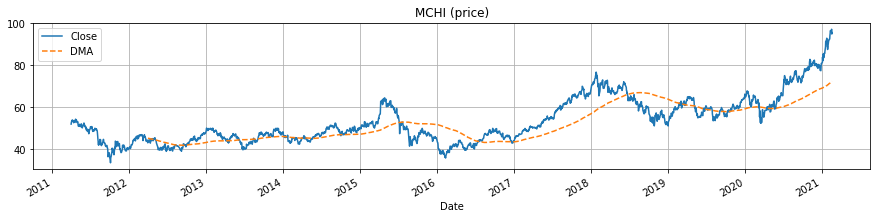

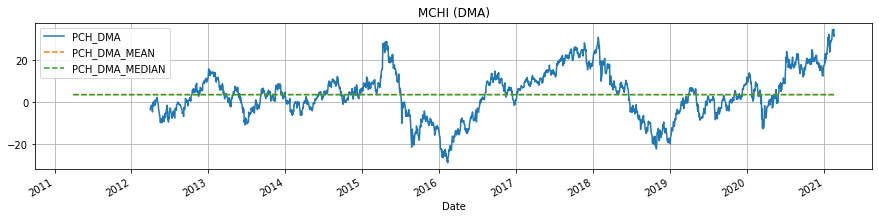

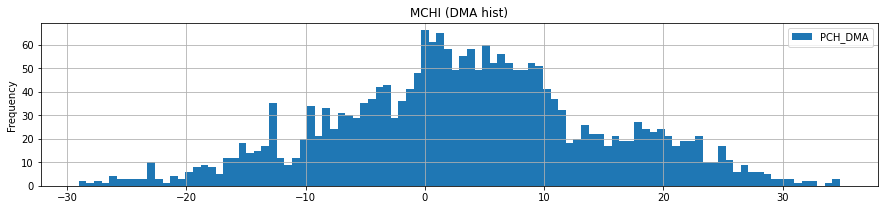

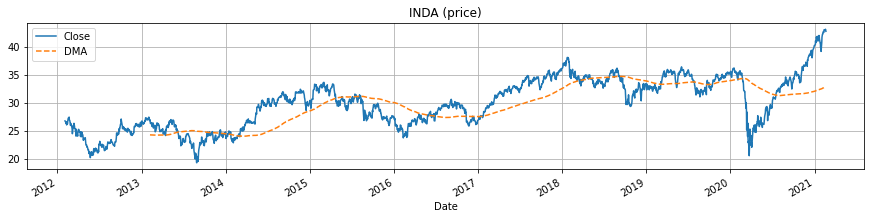

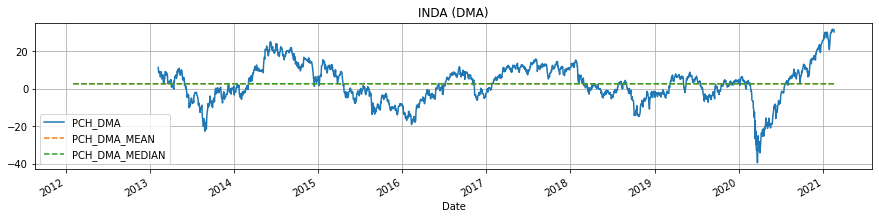

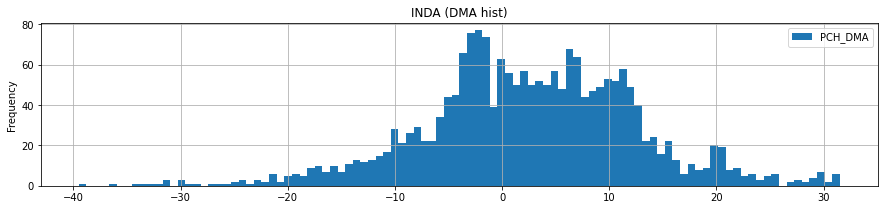

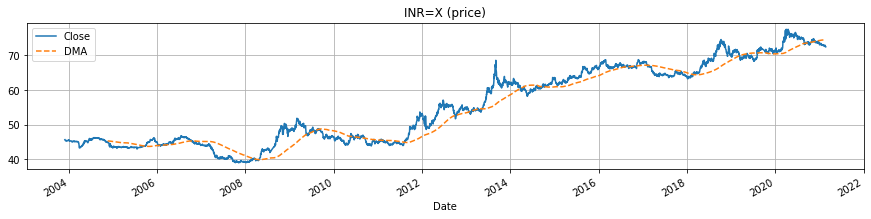

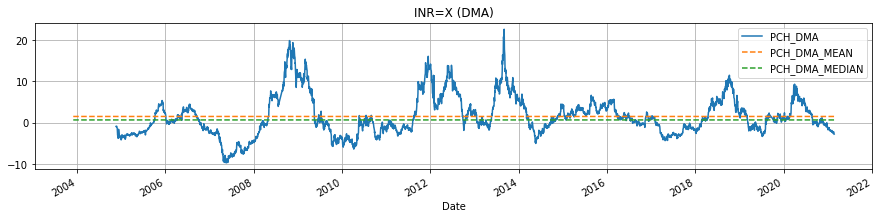

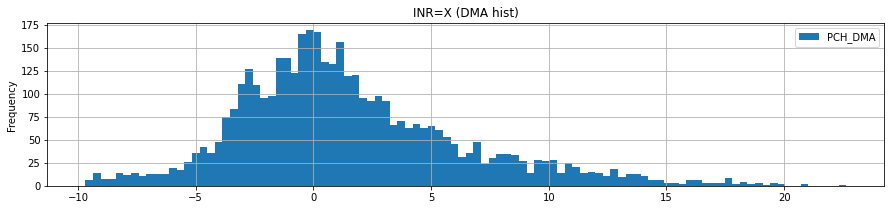

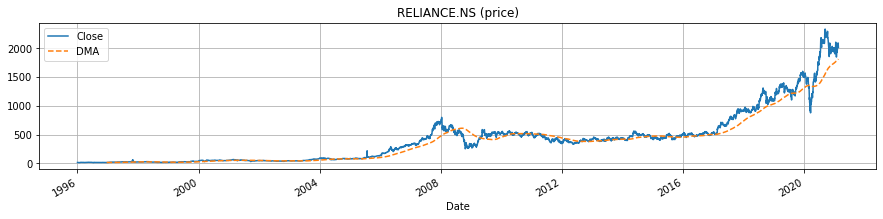

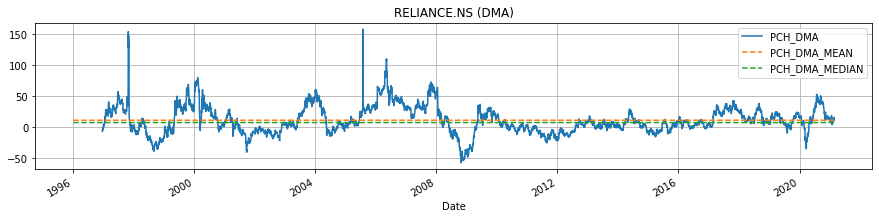

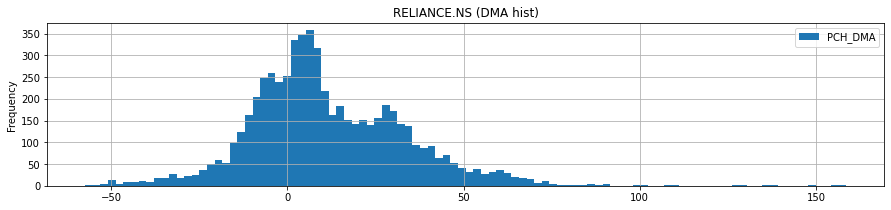

In [7]:
for t in dma_tickers:
    analyze_ticker_dma(t, ma_period=ma_period_1, start_date=start_date)